In [14]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [2]:
data<-read_csv("data/apple_quality.csv")
data

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id Size        Weight      Sweetness   Crunchiness Juiciness  
1     0   -3.97004852 -2.5123364   5.3463296  -1.01200871  1.8449004 
2     1   -1.19521719 -2.8392565   3.6640588   1.58823231  0.8532858 
3     2   -0.29202386 -1.3512820  -1.7384292  -0.34261593  2.8386355 
4     3   -0.65719577 -2.2716266   1.3248738  -0.09787472  3.6379705 
5     4    1.36421682 -1.2966119  -0.3846582  -0.55300577  3.0308744 
6     5   -3.42539975 -1.4090822  -1.9135112  -0.55577486 -3.8530715 
7     6    1.33160574  1.6359557   0.8759742  -1.67779794  3.1063445 
8     7   -1.99546210 -0.4289585   1.5306436  -0.74297168  0.1588340 
9     8   -3.86763223 -3.7345136   0.9864291  -1.20765455  2.2928729 
10    9   -0.72798271 -0.4428204  -4.0922228   0.59751292  0.3937143 
11   10   -2.69933629 -1.3295070  -1.4185069  -0.62554577  2.3710744 
12   11    2.45095984 -0.5641774  -1.6350407   0.94239987 -2.0873167 
13   12   -0.17081172 -1.8672711  -1.7718447   2.41315532 -3.0945547 
14   13   -1.34553054 -1.6237011   2.0441438   1.75481293  0.9975671 
15   14    2.83958094 -0.3447982  -1.0197973   0.89458086 -1.3000609 
16   15   -2.65988739 -2.7956842   4.2304036   0.69755040  2.1809111 
17   16   -1.46895155 -1.9503596  -2.2143729   0.90975851  2.8644489 
18   17   -0.07437018 -4.7147500   0.2497676   2.93531906  1.4097551 
19   18   -0.30236427  1.7243958  -2.4423372   3.46510848  0.4497917 
20   19   -2.10804990  0.3564674  -1.1561933   4.32672252  1.5615431 
21   20   -2.33458950 -2.9437089  -3.4526277   0.76239173  4.0764624 
22   21    1.17759278 -0.7216545  -1.3871162   7.61985180  1.0692884 
23   22   -2.42394622 -0.6985007   0.1460304   0.63010617  2.9905605 
24   23    0.13571420 -0.7537569  -2.1961465   1.03927609  0.5805376 
25   24    0.52296076 -1.4280852  -0.7435187   1.78671619 -4.2075435 
26   25   -1.29946839 -3.5047920  -1.1294020   0.55590538 -2.8075502 
27   26   -0.30069828 -0.5136033   0.9210062   1.37817207  2.2747467 
28   27    1.99983096  0.6699898  -2.0996160   2.64581897 -0.9894959 
29   28    1.44605205  1.6566918  -1.7775208   1.70896221 -0.3416703 
30   29   -0.59582548  1.5346799  -1.7693190   0.66450184 -0.4328745 
⋮    ⋮    ⋮           ⋮           ⋮           ⋮           ⋮          
3972 3971 -2.63462096 -0.44561478 -0.34489520  1.07807202  3.36461580
3973 3972  0.32064482  0.07085759 -0.36457219  0.89461858 -0.62453753
3974 3973  5.86586054 -6.01055919  0.24608060  4.50771548 -1.04160938
3975 3974 -2.36214348 -0.23342443  0.98134002  0.57128228  1.00778166
3976 3975 -3.27313869 -3.06004513  0.66678411  0.78217554 -0.36384158
3977 3976 -0.52441463  0.89792056 -1.37769390  1.57995389  0.99468990
3978 3977 -0.84502567 -0.66802082 -1.76075871  1.86799266 -1.40894954
3979 3978 -1.97162259  1.82869951 -1.78712601  0.96328596 -0.30050559
3980 3979 -4.39735000  0.06689644 -1.67190758  0.15363989 -1.31462619
3981 3980 -2.49258269 -2.06591657  1.08117994  1.26767289 -1.60072238
3982 3981  0.17394354 -1.67163529 -0.02346688  0.94161507 -1.13650932
3983 3982 -2.43445043  0.28078485  0.42624367  0.92420754  1.43996592
3984 3983 -3.65293620 -1.11750895  3.27179220 -1.26632036  2.36031885
3985 3984 -0.83253320  0.46347266 -0.84398317  1.48905785 -2.20579638
3986 3985 -0.23055017 -0.66995597 -1.89604921  0.65754541  1.84363356
3987 3986  1.81440103 -1.46163462 -2.51453857  2.97583771 -1.10972986
3988 3987 -4.03584961 -1.30135426  1.36723200  0.88799228  1.46444016
3989 3988 -1.85783400  1.54569753 -2.82535866 -0.52653283 -0.60250533
3990 3989 -2.28262507 -0.22551683 -1.69852417  0.93685469 -1.38548100
3991 3990 -1.39679408 -0.59959557 -1.93110375  1.81566755  1.67073231
3992 3991 -4.00776216  2.97016361  0.21816727 -0.49236896  1.65637489
3993 3992  1.76425349 -2.07969500 -0.08338286 -0.08672353 -1.70338463
3994 3993  1.52014250 -0.35262276 -3.20646736  1.34171901  0.67556807
3995 3994  1.48250801 -2.58118132 -0.30688782  1.52787681  1.05636124
3996 3995  0.05938644 -1.06740844 -3.71454866  0.47305165  1.69798630
3997 3996 -0.29

In [3]:
selected_data <- data |>
    select(Ripeness, Acidity, Quality)

selected_data

Ripeness    Acidity                           Quality
1     0.32983980 -0.491590483                      good   
2     0.86753008 -0.722809367                      good   
3    -0.03803333 2.621636473                       bad    
4    -3.41376134 0.790723217                       good   
5    -1.30384943 0.501984036                       good   
6     1.91461592 -2.981523169                      bad    
7    -1.84741673 2.414170509                       good   
8     0.97443786 -1.470125066                      good   
9     4.08092079 -4.871904758                      bad    
10    1.62085677 2.185607723                       bad    
11    3.40316452 -2.810808169                      bad    
12    1.21432169 1.294323927                       good   
13   -0.62488438 -2.076113997                      bad    
14    0.43417986 1.724026084                       good   
15    0.58237862 1.709708209                       good   
16   -0.08877540 -1.083620788                      good   
17    3.96595566 -0.558208683                      bad    
18   -2.64381021 1.250970347                       good   
19   -0.07436245 2.493781985                       bad    
20   -4.63017426 -1.37665721                       good   
21    6.34644535 0.726775672                       bad    
22   -3.73480541 2.642948241                       good   
23    0.77947290 3.184188187                       bad    
24    0.22730878 2.086618541                       bad    
25   -1.82523122 -1.430429857                      bad    
26    1.71463011 -3.846641823                      bad    
27    0.74533638 -2.93402889                       good   
28    0.37333013 -2.397691796                      bad    
29   -1.32243949 -1.158128067                      bad    
30    0.80043869 1.64595436                        bad    
⋮    ⋮           ⋮                                 ⋮      
3972 -0.40818003 -3.376490049                      good   
3973 -0.72539842 -0.114319001                      bad    
3974  5.30962222 3.285412981                       good   
3975  0.73360854 -0.105291052                      good   
3976  0.67490253 -4.469190139                      bad    
3977 -0.82402906 2.422747057                       bad    
3978  2.30349940 -0.772829229                      bad    
3979 -2.20279808 -2.072508474                      good   
3980  2.33633779 -0.912977459                      bad    
3981 -2.83194749 0.627116568                       good   
3982  0.68728270 -1.587952145                      bad    
3983  0.51779285 -2.334245356                      good   
3984  0.00721203 -2.022186257                      good   
3985 -0.45107469 0.725999977                       bad    
3986  0.47319450 1.461085428                       bad    
3987 -0.63142902 -2.793807727                      good   
3988  1.60855628 1.220319515                       bad    
3989  1.33849791 -0.395376725                      bad    
3990  3.24989419 1.047021307                       bad    
3991  1.61402668 -0.987967575                      bad    
3992 -2.13389511 -4.431320563                      good   
3993  3.84010102 -0.338260538                      good   
3994  0.10709312 -0.945080106                      bad    
3995  2.56082901 -1.229254586                      good   
3996  2.24405472 0.137784369                       bad    
3997 -1.08789973 1.854235285                       good   
3998  4.76385918 -1.334611391                      bad    
3999  0.21448838 -2.229719806                      good   
4000 -0.77657147 1.599796456                       good   
4001          NA Created_by_Nidula_Elgiriyewithana NA

Ripeness    Acidity      Quality
1     0.32983980 -0.491590483 good   
2     0.86753008 -0.722809367 good   
3    -3.41376134 0.790723217  good   
4    -1.30384943 0.501984036  good   
5    -1.84741673 2.414170509  good   
6     0.97443786 -1.470125066 good   
7     1.21432169 1.294323927  good   
8     0.43417986 1.724026084  good   
9     0.58237862 1.709708209  good   
10   -0.08877540 -1.083620788 good   
11   -2.64381021 1.250970347  good   
12   -4.63017426 -1.37665721  good   
13   -3.73480541 2.642948241  good   
14    0.74533638 -2.93402889  good   
15   -1.79718456 -2.636844815 good   
16   -0.70861123 1.166970737  good   
17    1.06267209 2.300330525  good   
18   -0.05647271 -1.495112616 good   
19    1.58309720 -2.478055932 good   
20    1.48010953 -2.292964433 good   
21   -3.38235740 2.519346925  good   
22    1.52560855 2.740924761  good   
23    1.09579366 2.627274158  good   
24   -3.23150403 1.248791791  good   
25    0.26778807 -4.454570173 good   
26    1.43064807 -2.298875523 good   
27   -0.02543681 0.85622891   good   
28    1.11506216 -1.198656978 good   
29    1.69623260 0.445840404  good   
30   -0.90458854 2.287350346  good   
⋮    ⋮           ⋮            ⋮      
1975  1.39261232 -1.015782155 good   
1976  1.31814066 -0.593803367 good   
1977 -2.43175842 0.008339593  good   
1978  0.03276757 -0.410368282 good   
1979  0.04086659 2.01900265   good   
1980  2.63235180 2.000125146  good   
1981 -1.57300971 3.617288034  good   
1982  0.19421657 -3.726145619 good   
1983  1.81120123 1.221697782  good   
1984  1.67916333 -0.941217156 good   
1985 -0.44287678 -0.970235117 good   
1986  0.65127093 -0.049725888 good   
1987 -0.49416226 -0.947002551 good   
1988 -0.15717532 -3.167304356 good   
1989  0.72091205 2.87016191   good   
1990  1.55644196 -0.684437591 good   
1991 -0.40818003 -3.376490049 good   
1992  5.30962222 3.285412981  good   
1993  0.73360854 -0.105291052 good   
1994 -2.20279808 -2.072508474 good   
1995 -2.83194749 0.627116568  good   
1996  0.51779285 -2.334245356 good   
1997  0.00721203 -2.022186257 good   
1998 -0.63142902 -2.793807727 good   
1999 -2.13389511 -4.431320563 good   
2000  3.84010102 -0.338260538 good   
2001  2.56082901 -1.229254586 good   
2002 -1.08789973 1.854235285  good   
2003  0.21448838 -2.229719806 good   
2004 -0.77657147 1.599796456  good

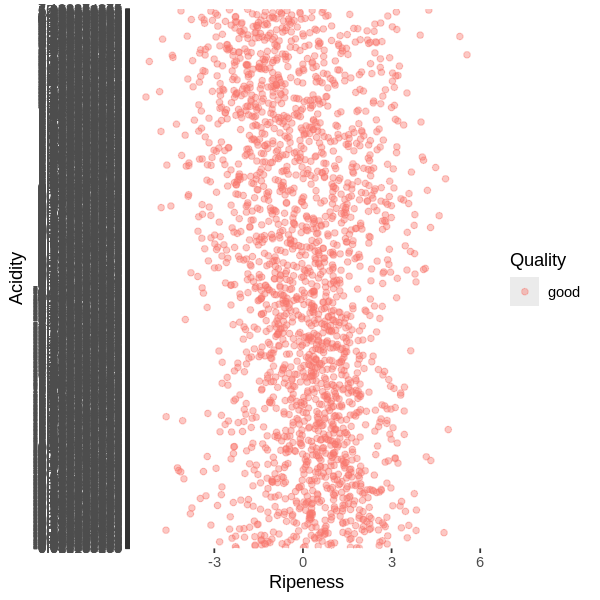

In [11]:
quality_good_data <- data |>
    select(Ripeness, Acidity, Quality) |>
    filter(Quality == "good", na.rm = TRUE)

quality_good_data

options(repr.plot.width = 5, repr.plot.height = 5)
plot_filtered_good_data <- quality_good_data  |>
    ggplot(aes(x= Ripeness, y = Acidity, color = Quality)) +
    geom_point(alpha =0.4) +
    labs(x = "Ripeness",
         y = "Acidity",
         color = "Quality")
plot_filtered_good_data


Ripeness    Acidity      Quality
1    -0.03803333 2.621636473  bad    
2     1.91461592 -2.981523169 bad    
3     4.08092079 -4.871904758 bad    
4     1.62085677 2.185607723  bad    
5     3.40316452 -2.810808169 bad    
6    -0.62488438 -2.076113997 bad    
7     3.96595566 -0.558208683 bad    
8    -0.07436245 2.493781985  bad    
9     6.34644535 0.726775672  bad    
10    0.77947290 3.184188187  bad    
11    0.22730878 2.086618541  bad    
12   -1.82523122 -1.430429857 bad    
13    1.71463011 -3.846641823 bad    
14    0.37333013 -2.397691796 bad    
15   -1.32243949 -1.158128067 bad    
16    0.80043869 1.64595436   bad    
17    2.58598571 -3.036919711 bad    
18   -3.35198841 5.560108693  bad    
19    4.97563997 -0.98138767  bad    
20   -0.70077885 1.071129708  bad    
21    1.25976818 -1.680924092 bad    
22   -2.77627496 0.184905607  bad    
23    2.31730991 3.097818375  bad    
24    2.57780352 0.650677868  bad    
25    2.21809937 2.865048371  bad    
26    0.92919741 1.416983091  bad    
27    3.20170779 -0.58628671  bad    
28    0.68878842 1.619183695  bad    
29   -1.48035112 2.769458608  bad    
30    2.66211102 -0.112472887 bad    
⋮    ⋮           ⋮            ⋮      
1967 -1.4297613  4.13039773   bad    
1968 -1.9629765  2.257634168  bad    
1969 -0.2000070  1.165776955  bad    
1970  2.5516354  -0.873064683 bad    
1971  6.1025870  0.503799062  bad    
1972  1.3317081  -0.071538203 bad    
1973  1.8664720  -5.384860338 bad    
1974  1.9968676  -2.506381031 bad    
1975 -4.6761702  4.689126107  bad    
1976  0.3673477  -0.74790279  bad    
1977  1.5193256  0.109579238  bad    
1978  0.7081113  0.430274164  bad    
1979  0.3136653  1.262024005  bad    
1980  1.4582813  3.321828024  bad    
1981  5.2949699  -0.703213729 bad    
1982 -0.7253984  -0.114319001 bad    
1983  0.6749025  -4.469190139 bad    
1984 -0.8240291  2.422747057  bad    
1985  2.3034994  -0.772829229 bad    
1986  2.3363378  -0.912977459 bad    
1987  0.6872827  -1.587952145 bad    
1988 -0.4510747  0.725999977  bad    
1989  0.4731945  1.461085428  bad    
1990  1.6085563  1.220319515  bad    
1991  1.3384979  -0.395376725 bad    
1992  3.2498942  1.047021307  bad    
1993  1.6140267  -0.987967575 bad    
1994  0.1070931  -0.945080106 bad    
1995  2.2440547  0.137784369  bad    
1996  4.7638592  -1.334611391 bad

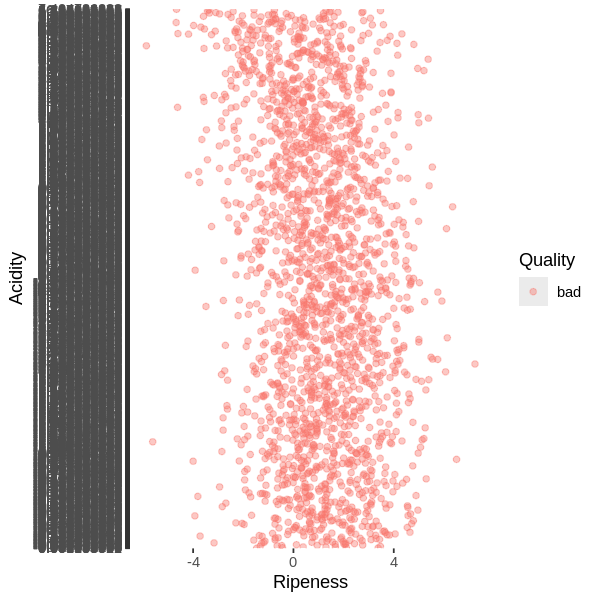

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)

quality_bad_data <- data |>
    select(Ripeness, Acidity, Quality) |>
    filter(Quality == "bad", na.rm = TRUE)

quality_bad_data
plot_filtered_bad_data <- quality_bad_data  |>
    ggplot(aes(x= Ripeness, y = Acidity, color = Quality)) +
    geom_point(alpha =0.4) +
    labs(x = "Ripeness",
         y = "Acidity",
         color = "Quality")
plot_filtered_bad_data

In [46]:
set.seed(1)
apple_split<-initial_split(selected_data, prop=0.75, strata=Quality)
apple_train<-training(apple_split)
apple_test<-testing(apple_split)
glimpse(apple_train)
#create the split
#remember to use set.seed(1) at the beginning of the column.

Rows: 3,000
Columns: 3
$ Ripeness <dbl> -0.03803333, 3.40316452, 3.96595566, -0.07436245, 6.34644535,…
$ Acidity  <chr> "2.621636473", "-2.810808169", "-0.558208683", "2.493781985",…
$ Quality  <chr> "bad", "bad", "bad", "bad", "bad", "bad", "bad", "bad", "bad"…


In [44]:
set.seed(1)

apple_vfold<- vfold_cv(apple_train, v=5, strata=Quality)

apple_recipe<- recipe(Quality~.,data=apple_train)|>
 step_scale(all_predictors())|>
 step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

knn_results<-workflow() |>
 add_recipe(apple_recipe) |>
 add_model(knn_spec) |>
 tune_grid(resamples=apple_vfold, grid=10) |>
 collect_metrics()
knn_results


ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'double'
